<a href="https://colab.research.google.com/github/OVP2023/NN/blob/main/DZ_CV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Решить задачу детекции на основе SSD

In [ ]:
import os, sys, random
import xml.etree.ElementTree as ET
from glob import glob
import pandas as pd
from shutil import copyfile

In [18]:
annotations = glob('/content/drive/MyDrive/Datasets/BCCD_Dataset-master/BCCD/Annotations/*.xml')

df = []
cnt = 0
for file in annotations:
    filename = '/content/drive/MyDrive/Datasets/BCCD_Dataset-master/BCCD/JPEGImages/'+file.split('/')[-1].split('.')[0] + '.jpg'

    row = []
    parsedXML = ET.parse(file)
    for node in parsedXML.getroot().iter('object'):
        blood_cells = node.find('name').text
        xmin = int(node.find('bndbox/xmin').text)
        xmax = int(node.find('bndbox/xmax').text)
        ymin = int(node.find('bndbox/ymin').text)
        ymax = int(node.find('bndbox/ymax').text)

        row = [filename, blood_cells, xmin, xmax, ymin, ymax]
        df.append(row)
        cnt += 1

data = pd.DataFrame(df, columns=['filename', 'cell_type', 'xmin', 'xmax', 'ymin', 'ymax'])

data[['filename', 'cell_type', 'xmin', 'xmax', 'ymin', 'ymax']].to_csv('test.csv', index=False)
data

,filename,cell_type,xmin,xmax,ymin,ymax
0,/content/drive/MyDrive/Datasets/BCCD_Dataset-m...,RBC,229,342,238,330
1,/content/drive/MyDrive/Datasets/BCCD_Dataset-m...,RBC,152,268,146,257
2,/content/drive/MyDrive/Datasets/BCCD_Dataset-m...,RBC,150,266,144,255
3,/content/drive/MyDrive/Datasets/BCCD_Dataset-m...,RBC,70,179,197,300
4,/content/drive/MyDrive/Datasets/BCCD_Dataset-m...,RBC,7,103,1,82
...,...,...,...,...,...,...
4883,/content/drive/MyDrive/Datasets/BCCD_Dataset-m...,RBC,169,258,234,312
4884,/content/drive/MyDrive/Datasets/BCCD_Dataset-m...,RBC,174,264,283,396
4885,/content/drive/MyDrive/Datasets/BCCD_Dataset-m...,RBC,573,640,198,336
4886,/content/drive/MyDrive/Datasets/BCCD_Dataset-m...,RBC,93,208,113,238


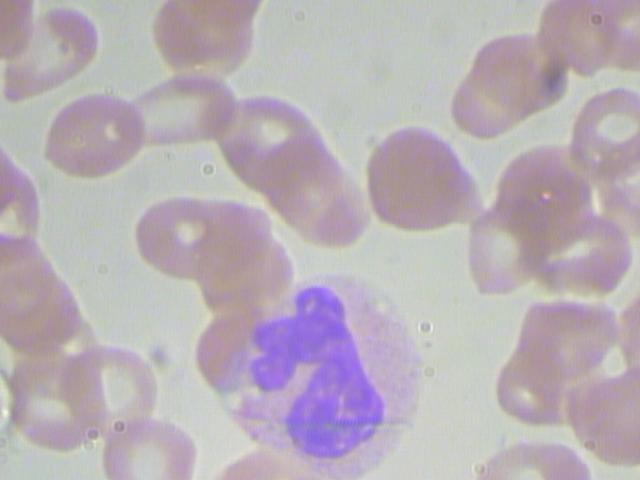

In [15]:
from PIL import Image
Image.open('/content/drive/MyDrive/Datasets/BCCD_Dataset-master/BCCD/JPEGImages/BloodImage_00260.jpg')